In [1]:
import pandas as pd
import altair as alt
import datetime as dt

In [3]:
df = pd.read_csv('../data/supermarket_sales.csv',
                 parse_dates = {'Date_time': ['Date', 'Time']})
df

,Date_time,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,2019-01-05 13:08:00,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1
1,2019-03-08 10:29:00,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6
2,2019-03-03 13:23:00,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4
3,2019-01-27 20:33:00,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4
4,2019-02-08 10:37:00,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2019-01-29 13:46:00,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,Ewallet,40.35,4.761905,2.0175,6.2
996,2019-03-02 17:16:00,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,Ewallet,973.80,4.761905,48.6900,4.4
997,2019-02-09 13:22:00,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,Cash,31.84,4.761905,1.5920,7.7
998,2019-02-22 15:33:00,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,Cash,65.82,4.761905,3.2910,4.1


In [4]:
# Add day of the week
df['Day_of_week'] = df['Date_time'].dt.weekday_name

In [25]:
# Assign transactions between 09:00-12:59 as 'Morning'
morning = df.set_index('Date_time').between_time('09:00', '12:59')
morning['Time_of_day'] = 'Morning'

# Assign transactions between 13:00-16:59 as 'Afternoon'
afternoon = df.set_index('Date_time').between_time('13:00', '16:59')
afternoon['Time_of_day'] = 'Afternoon'

# Assign transactions between 17:00-20:59 as 'Evening'
evening = df.set_index('Date_time').between_time('17:00', '20:59')
evening['Time_of_day'] = 'Evening'

new_df = pd.concat([morning, afternoon, evening])

# Subset data by city/branch
new_df_a = new_df.query("Branch == 'A'")
new_df_b = new_df.query("Branch == 'B'")
new_df_c = new_df.query("Branch == 'C'")

# Write .csv
# new_df.to_csv('../data/supermarket_sales_clean.csv')

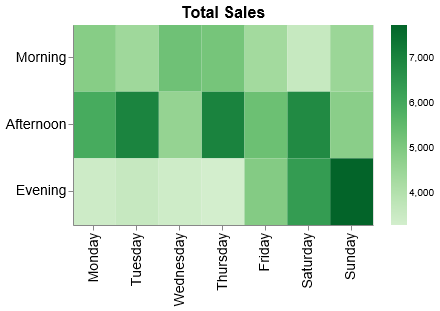

In [12]:
# Plot total transaction (pre-filtered by store A for example)
# for color scheme choose btween viridis, magma, inferno, plasma, bluegreen, bluepurple

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
times = ['Morning', 'Afternoon', 'Evening']

plot_1 = (alt
 .Chart(new_df_a)
 .mark_rect()
 .encode(
     alt.X('Day_of_week:N', title=None, sort=days),
     alt.Y('Time_of_day:N', title=None, sort=times),
     alt.Color('sum(Total):Q', title=None, scale=alt.Scale(scheme='greens')),
     tooltip=[alt.Tooltip('Day_of_week', title='Day of the week'), 
              alt.Tooltip('Time_of_day', title="Time of the day"), 
              alt.Tooltip('sum(Total):Q', title='Sales', format='$,.0f')])
 .configure_axis(labelFontSize=14, titleFontSize=14)
 .configure_title(fontSize=16)
 .properties(width=300, height=200, title='Total Sales')
)

plot_1

In [7]:
plot_1.save('plot_1.html')

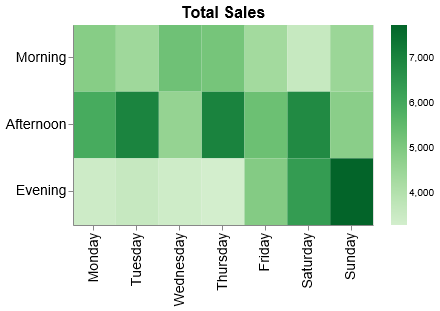

In [13]:
# Same plot as above, using `transform_filter`

plot_1_transform = (alt
 .Chart(new_df)
 .mark_rect()
 .encode(
     alt.X('Day_of_week:N', title=None, sort=days),
     alt.Y('Time_of_day:N', title=None, sort=times),
     alt.Color('sum(Total):Q', title=None, scale=alt.Scale(scheme='greens')),
     tooltip=[alt.Tooltip('Day_of_week', title = 'Day of the week'), 
              alt.Tooltip('Time_of_day', title = "Time of the day"), 
              alt.Tooltip('sum(Total):Q', title = 'Sales', format='$,.0f')])
 .transform_filter(alt.FieldEqualPredicate(field='Branch', equal='A'))
 .configure_axis(labelFontSize=14, titleFontSize=14)
 .configure_title(fontSize=16)
 .properties(width=300, height=200, title='Total Sales')
)

plot_1_transform

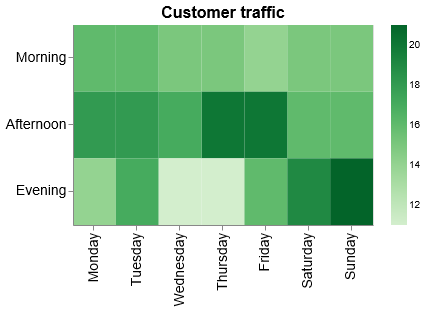

In [15]:
# Plot total transaction count (pre-filtered by store A for example)

plot_2 = (alt
 .Chart(new_df_a)
 .mark_rect()
 .encode(
     alt.X('Day_of_week:N', title=None, sort=days),
     alt.Y('Time_of_day:N', title=None, sort=times),
     alt.Color('count(Invoice ID):Q', title=None, scale=alt.Scale(scheme='greens')),
     tooltip=[alt.Tooltip('Day_of_week', title = 'Day of the week'), 
              alt.Tooltip('Time_of_day', title = "Time of the day"), 
              alt.Tooltip('count(Invoice ID):Q', title = 'No. of transactions')])
 .configure_axis(labelFontSize=14, titleFontSize=14)
 .configure_title(fontSize=16)
 .properties(width=300, height=200, title='Customer traffic')
)

plot_2

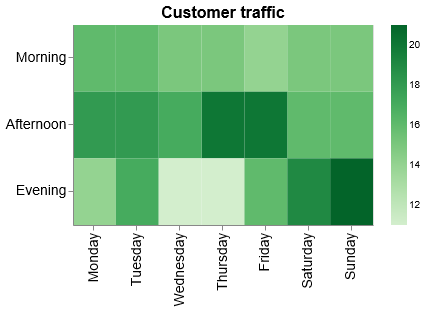

In [17]:
# Same plot as above, using `transform_filter`

plot_2_transform = (alt
 .Chart(new_df)
 .mark_rect()
 .encode(
     alt.X('Day_of_week:N', title=None, sort=days),
     alt.Y('Time_of_day:N', title=None, sort=times),
     alt.Color('count(Invoice ID):Q', title=None, scale=alt.Scale(scheme='greens')),
     tooltip=[alt.Tooltip('Day_of_week', title = 'Day of the week'), 
              alt.Tooltip('Time_of_day', title = "Time of the day"), 
              alt.Tooltip('count(Invoice ID):Q', title = 'No. of transactions')])
 .transform_filter(alt.FieldEqualPredicate(field='Branch', equal='A'))
 .configure_axis(labelFontSize=14, titleFontSize=14)
 .configure_title(fontSize=16)
 .properties(width=300, height=200, title='Customer traffic')
)

plot_2_transform

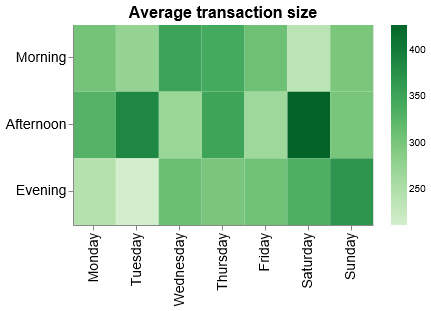

In [19]:
# Plot average transaction size (pre-filtered by store A for example)

plot_3 = (alt
 .Chart(new_df_a)
 .mark_rect()
 .transform_aggregate(groupby = ['Branch', 'Day_of_week', 'Time_of_day'],
                      total_sales = 'sum(Total):Q',
                      total_trxns = 'count(Invoice ID):Q')
 .transform_calculate(Avg_trans_size = 'datum.total_sales / datum.total_trxns')
 .encode(
     alt.X('Day_of_week:N', title=None, sort=days),
     alt.Y('Time_of_day:N', title=None, sort=times),
     alt.Color('Avg_trans_size:Q', title=None, scale=alt.Scale(scheme='greens')),
     tooltip=[alt.Tooltip('Day_of_week', title = 'Day of the week'), 
              alt.Tooltip('Time_of_day', title = "Time of the day"), 
              alt.Tooltip('Avg_trans_size:Q', title = 'Average transaction size', format='$,.0f')])
 .configure_axis(labelFontSize=14, titleFontSize=14)
 .configure_title(fontSize=16)
 .properties(width=300, height=200, title='Average transaction size')
)

plot_3

In [21]:
# I can only think of creating a new data frame to plot average transaction size

agg_df = (new_df
 .groupby(['Branch', 'Day_of_week', 'Time_of_day'])
 .agg({'Total': 'sum', 'Invoice ID': 'count'})
 .reset_index())

agg_df['Avg_trans_size'] = agg_df['Total'] / agg_df['Invoice ID']
agg_df.head()

,Branch,Day_of_week,Time_of_day,Total,Invoice ID,Avg_trans_size
0,A,Friday,Afternoon,5314.6275,20,265.731375
1,A,Friday,Evening,4901.2845,16,306.330281
2,A,Friday,Morning,4327.9530,14,309.139500
3,A,Monday,Afternoon,5945.1000,18,330.283333
4,A,Monday,Evening,3436.2405,14,245.445750


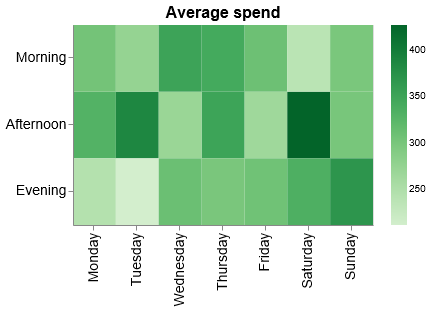

In [22]:
# Let's try this... plot average transaction size for store A using `transform_filter`

plot_3 = (alt
 .Chart(agg_df)
 .mark_rect()
 .encode(
     alt.X('Day_of_week:N', title=None, sort=days),
     alt.Y('Time_of_day:N', title=None, sort=times),
     alt.Color('Avg_trans_size:Q', title=None, scale=alt.Scale(scheme='greens')),
     tooltip=[alt.Tooltip('Day_of_week', title = 'Day of the week'), 
              alt.Tooltip('Time_of_day', title = "Time of the day"), 
              alt.Tooltip('Avg_trans_size:Q', title = 'Average transaction size', format='$,.0f')])
 .transform_filter(alt.FieldEqualPredicate(field='Branch', equal='A'))
 .configure_axis(labelFontSize=14, titleFontSize=14)
 .configure_title(fontSize=16)
 .properties(width=300, height=200, title='Average spend')
)

plot_3

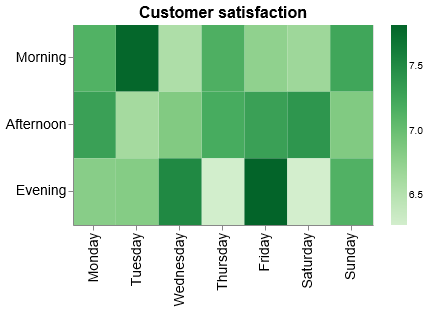

In [26]:
# Plot average customer satisfaction (pre-filtered by store A for example)

plot_4 = (alt
 .Chart(new_df_a)
 .mark_rect()
 .encode(
     alt.X('Day_of_week:N', title=None, sort=days),
     alt.Y('Time_of_day:N', title=None, sort=times),
     alt.Color('mean(Rating):Q', title=None, scale=alt.Scale(scheme='greens')),
     tooltip=[alt.Tooltip('Day_of_week', title = 'Day of the week'), 
              alt.Tooltip('Time_of_day', title = "Time of the day"), 
              alt.Tooltip('mean(Rating):Q', title = 'Average satisfaction', format='.2f')])
 .configure_axis(labelFontSize=14, titleFontSize=14)
 .configure_title(fontSize=16)
 .properties(width=300, height=200, title='Customer satisfaction')
)

plot_4

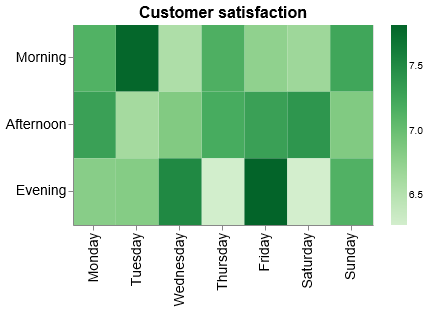

In [24]:
# Same plot as above, using `transform_filter`

plot_4_transform = (alt
 .Chart(new_df)
 .mark_rect()
 .encode(
     alt.X('Day_of_week:N', title=None, sort=days),
     alt.Y('Time_of_day:N', title=None, sort=times),
     alt.Color('mean(Rating):Q', title=None, scale=alt.Scale(scheme='greens')),
     tooltip=[alt.Tooltip('Day_of_week', title = 'Day of the week'), 
              alt.Tooltip('Time_of_day', title = "Time of the day"), 
              alt.Tooltip('mean(Rating):Q', title = 'Average satisfaction', format='.2f')])
 .transform_filter(alt.FieldEqualPredicate(field='Branch', equal='A'))
 .configure_axis(labelFontSize=14, titleFontSize=14)
 .configure_title(fontSize=16)
 .properties(width=300, height=200, title='Customer satisfaction')
)

plot_4_transform